# Встроенные наборы данных (sklearn.datasets)

[sklearn.datasets](http://scikit-learn.org/stable/datasets/) является модулем генерации модельных данных

In [5]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import model_selection, datasets, metrics, tree

import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Генерация выборок

**Способы генерации данных:** 
* make_classification
* make_regression
* make_circles
* make_checkerboard
* etc

### 1.1 datasets.make_circles

In [23]:
def plot_2d_dataset(data, colors):
    """Функция принимает двумерные данные, карту цветов. Возвращает график."""
    fig, nx = pyplot.subplots(figsize=(8,8), dpi=100)
    pyplot.scatter(list(map(lambda x: x[0], data[0])), list(map(lambda x: x[1], data[0])), c = data[1], cmap = colors)
    pyplot.title('Распределение данных')
    pyplot.xlabel('Признак x1')
    pyplot.ylabel('Признак x2')
    pyplot.grid(True)
#     pyplot.savefig('test1.pdf')
    pyplot.show()

Feature [-0.969, 0.249],   	target 0
Feature [-0.187, -0.982],   	target 0
Feature [-0.775, -0.199],   	target 1
Feature [-0.429, -0.675],   	target 1
Feature [-0.426, 0.905],   	target 0
Feature [0.51, 0.616],   	target 1
Feature [-0.51, 0.616],   	target 1
Feature [-0.701, 0.385],   	target 1
Feature [0.876, -0.482],   	target 0
Feature [0.775, -0.199],   	target 1


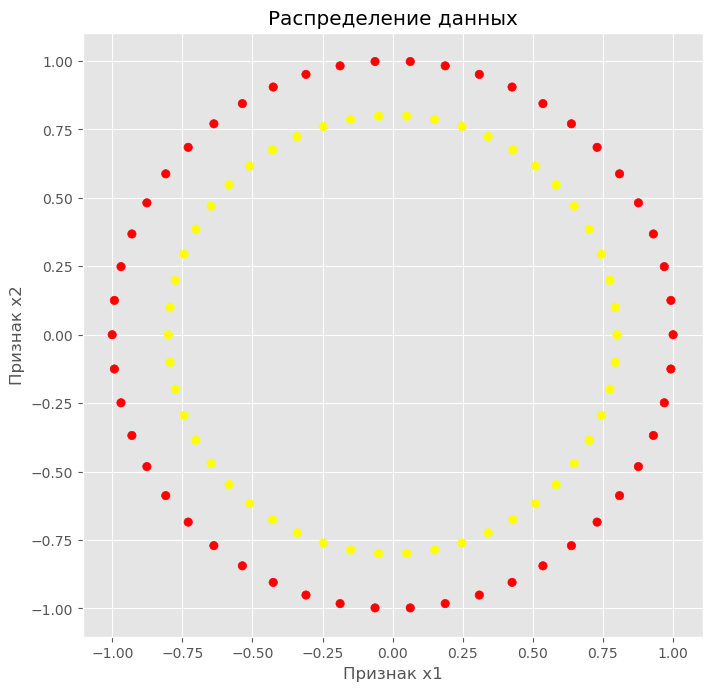

In [36]:
# Генерация выборки make_circles
circles = datasets.make_circles()

# Признаковое пространство и целевая функция
for feature, target in zip(circles[0][:10], circles[1][:10]):
    feature_3f = [round(feat, 3) for feat in feature]    
    print(f'Feature {feature_3f},   \ttarget {target}')

# Визуализация данных
colors = ListedColormap(['red', 'yellow'])
plot_2d_dataset(circles, colors)

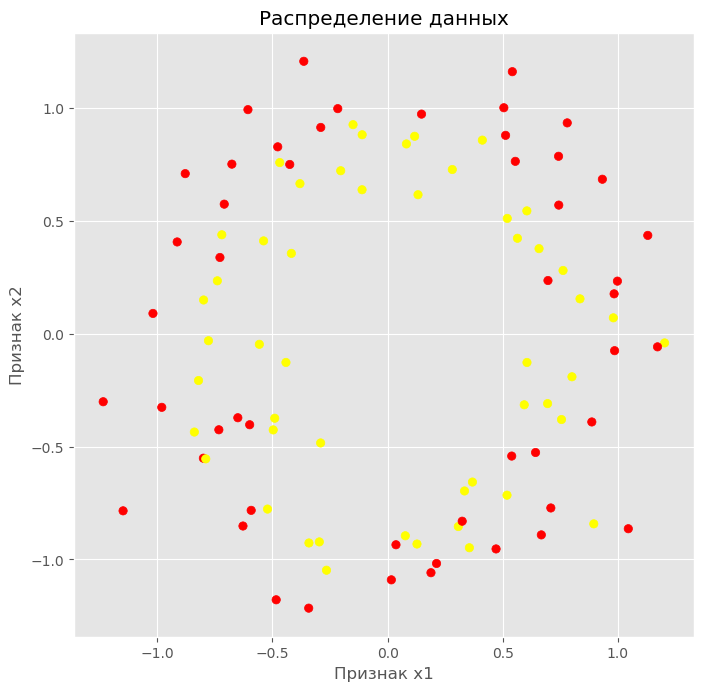

In [20]:
# Добавление шума к данным
noisy_circles = datasets.make_circles(noise = 0.15)

# Визуализация данных
colors = ListedColormap(['red', 'yellow'])
plot_2d_dataset(noisy_circles, colors)

### 1.2 datasets.make_classification

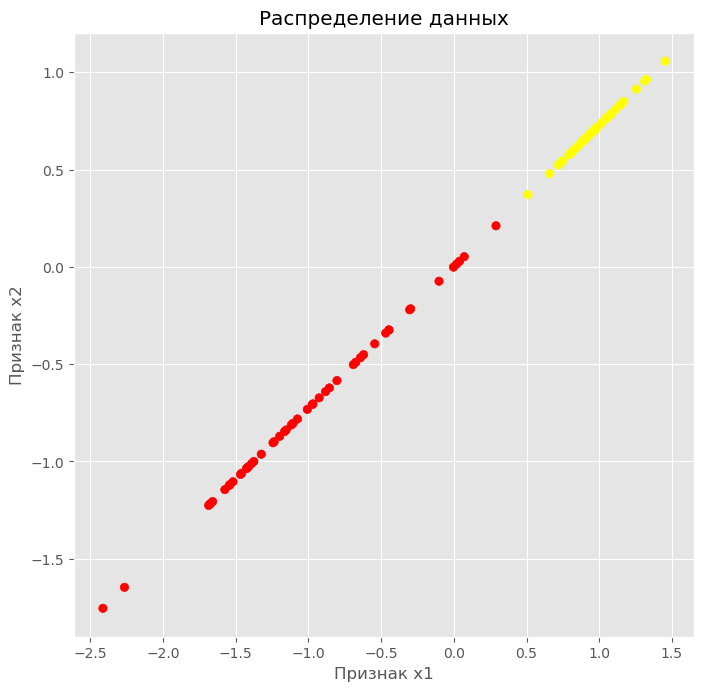

In [21]:
# Зададим 2 признака (n_features) и 1 информативный признак (n_informative).
# Количество классов (n_classes) - 2. Задано по умолчанию.

simple_classification_problem = datasets.make_classification(n_features = 2, n_informative = 1,
                                                            n_redundant = 1, n_clusters_per_class = 1,
                                                            random_state = 1 )

# Визуализация данных
colors = ListedColormap(['red', 'yellow'])
plot_2d_dataset(simple_classification_problem, colors)

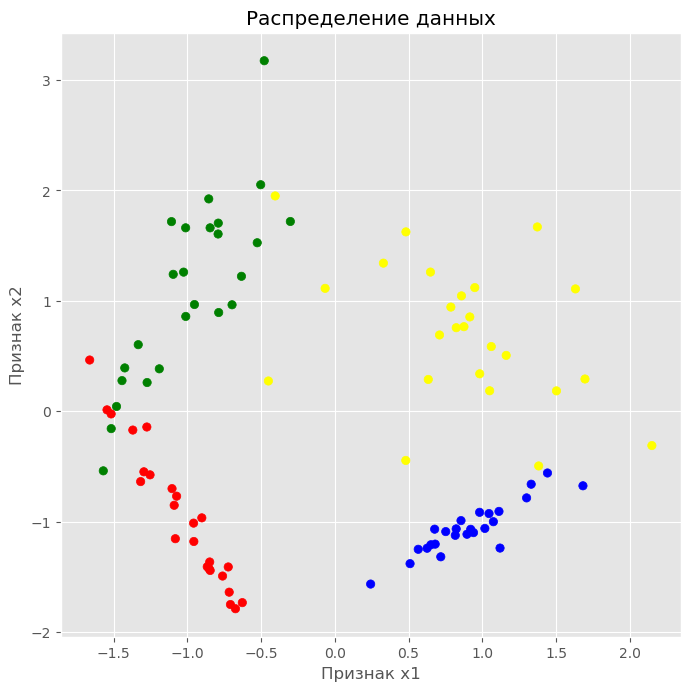

In [22]:
# Модифицируем задачу классификации, изменим количество классов (n_classes) с 2 до 4.
# Количество информативных признаков (n_informative) увеличим до двух.

classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1, random_state = 1)


# Визулизация данных
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])
plot_2d_dataset(classification_problem, colors)

## 2. "Игрушечные" наборы данных

Игрушечные наборы данных часто используются для тестирования алгоритмов

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits - Многоклассовая классификация (10 классов). Целые неотрицательные значения признаков (1797, 65).
* load_linnerud
* load_breast_cancer - Выборка с вещественными признаками (569, 31)
* etc

### 2.1 datasets.load_iris

In [37]:
# Загрузка встроенного "игрушечного" набора данных "Ирисы Фишера"
iris = datasets.load_iris()

In [38]:
# Атрибуты набора данных
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [39]:
# Преобразование признакового описания в таблицу DataFrame
iris_frame = pd.DataFrame(iris.data)

# Добавление имен столбцам признаков
iris_frame.columns = iris.feature_names

# Добавление столбца классов
iris_frame['target'] = iris.target

# Замена меток классов в DataFrame на их имена
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [40]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Визуализация данных

In [41]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import model_selection, datasets, metrics, tree

import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Генерация данных** для демонстрации возможности визуализации данных

In [42]:
# Загрузка встроенного "игрушечного" набора данных "Ирисы Фишера"
iris = datasets.load_iris()

# Преобразование признакового описания в таблицу DataFrame
iris_frame = pd.DataFrame(iris.data)

# Добавление имен столбцам признаков
iris_frame.columns = iris.feature_names

# Добавление столбца классов
iris_frame['target'] = iris.target

# Замена меток классов в DataFrame на их имена
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

## 1. Библиотека Matplotlib

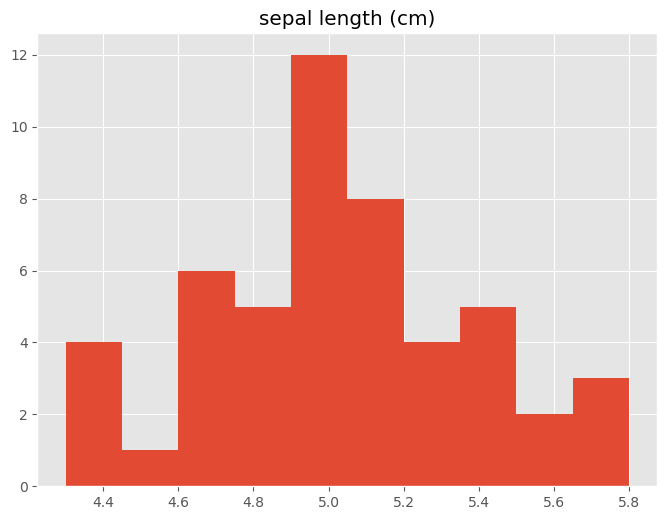

In [53]:
# Распределение данных по признаку 'sepal length (cm)' целевой функции 'setosa'
fig, nx = pyplot.subplots(figsize=(8,6), dpi=100)
pyplot.hist(x=iris_frame[iris_frame.target == 'setosa']['sepal length (cm)'])
pyplot.title('sepal length (cm)')
pyplot.ylabel('')
pyplot.xlabel('')
pyplot.grid(True)
pyplot.show()

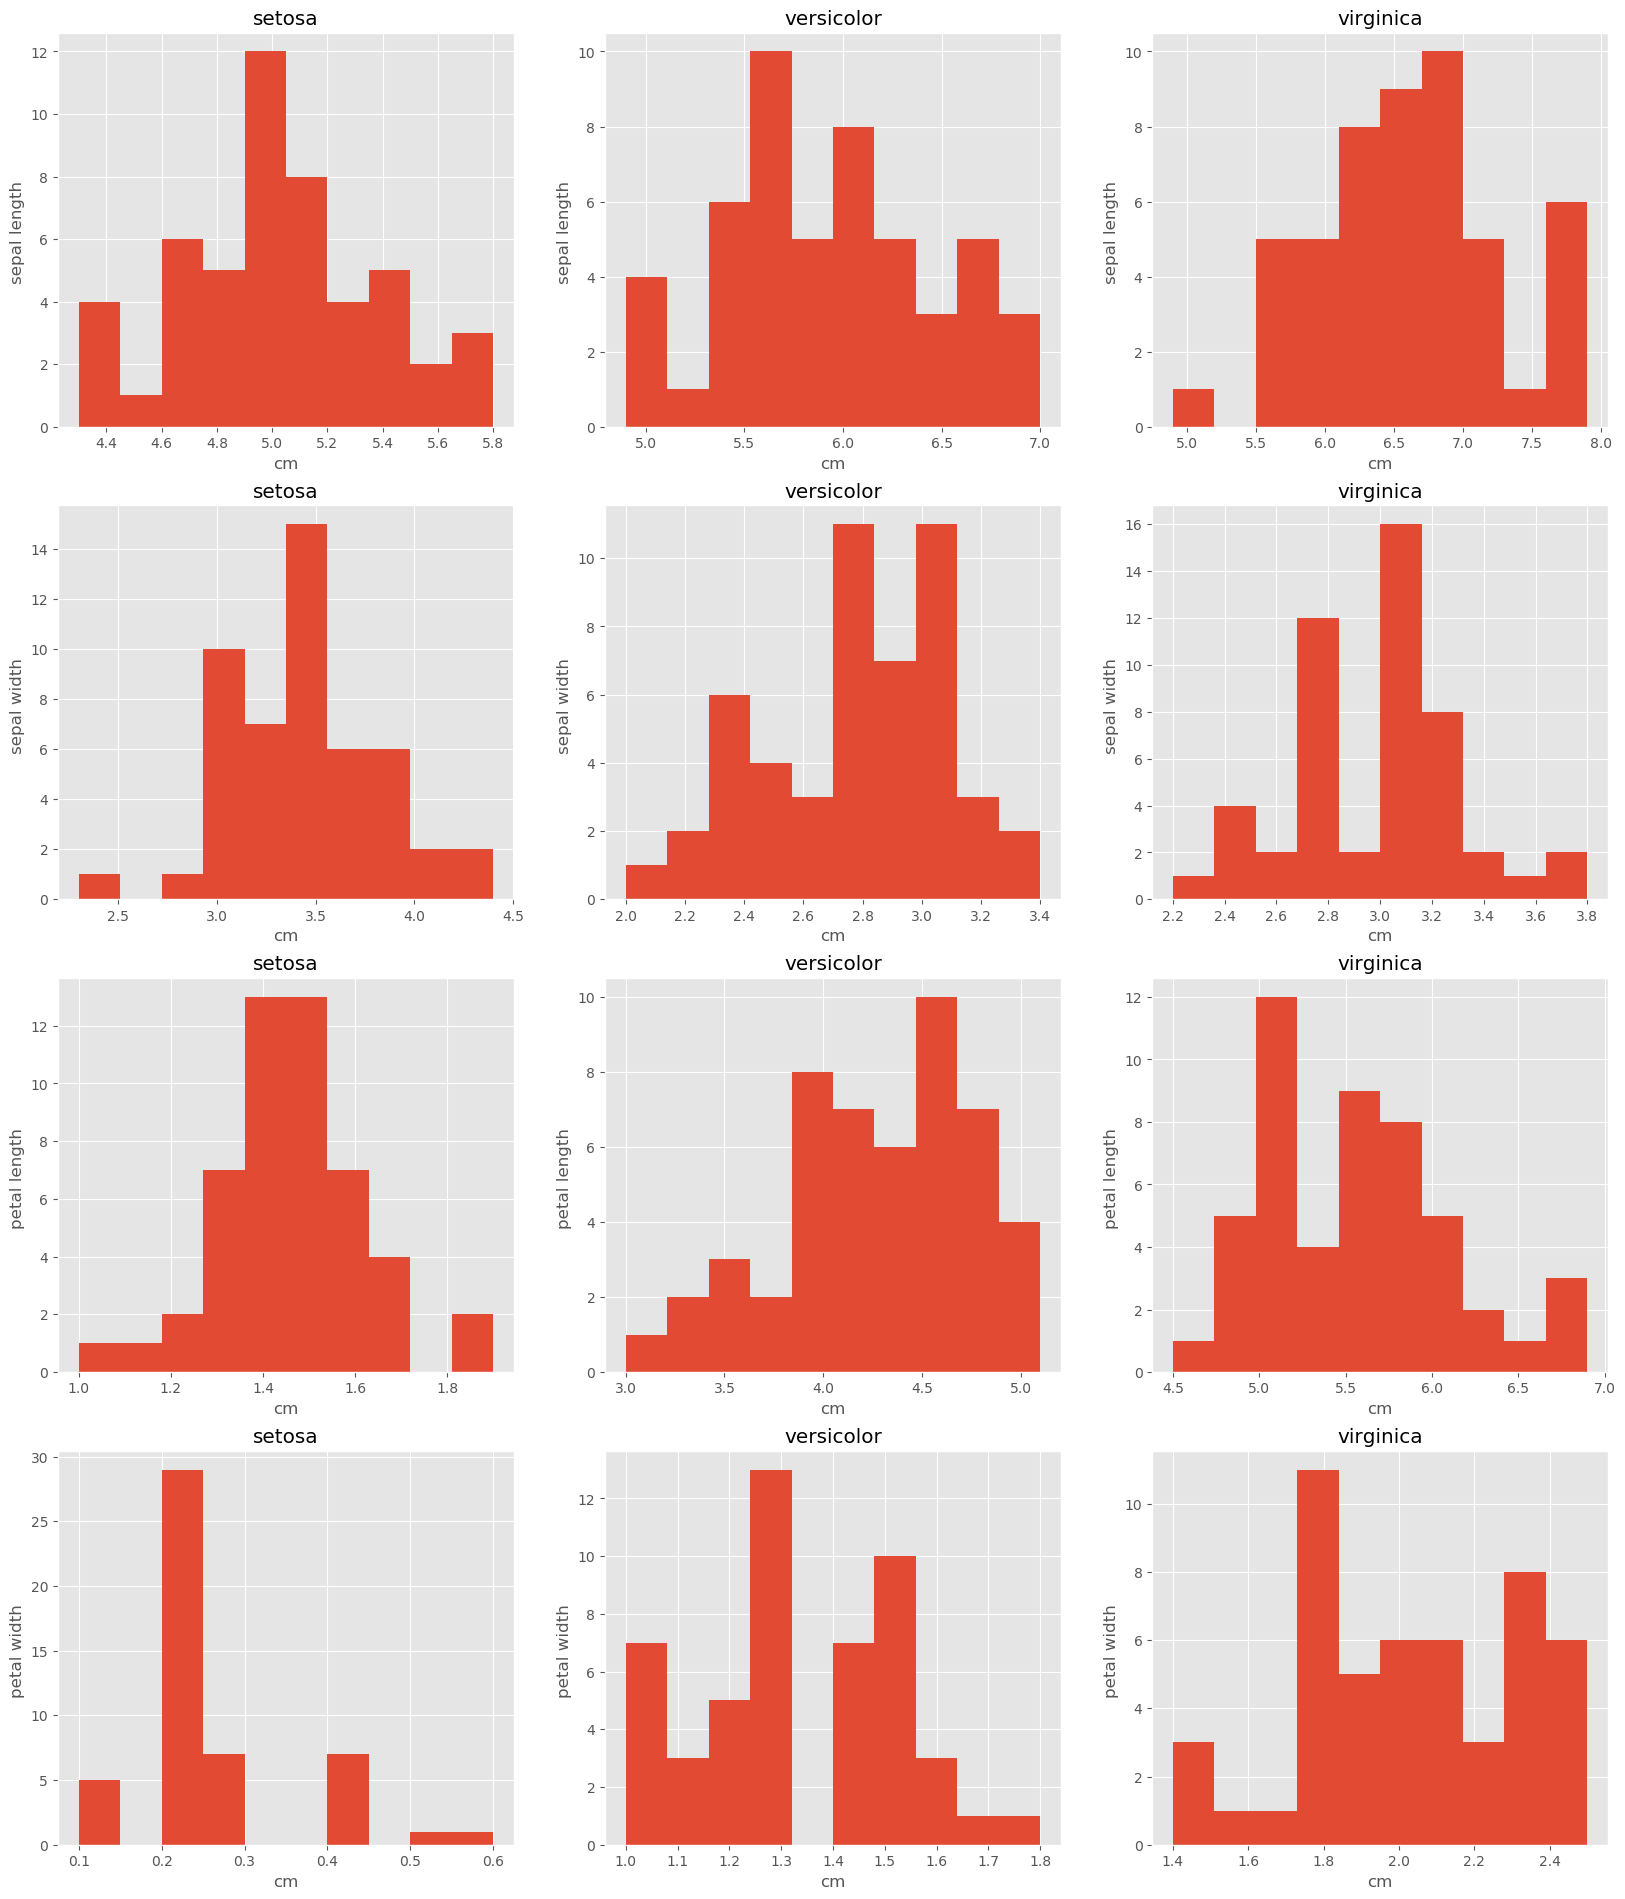

In [55]:
# Распределение данных всех признаков по всем классам целевой функции

fig, nx = pyplot.subplots(figsize=(20, 24), dpi=100)
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

## 2. Библиотека Seaborn

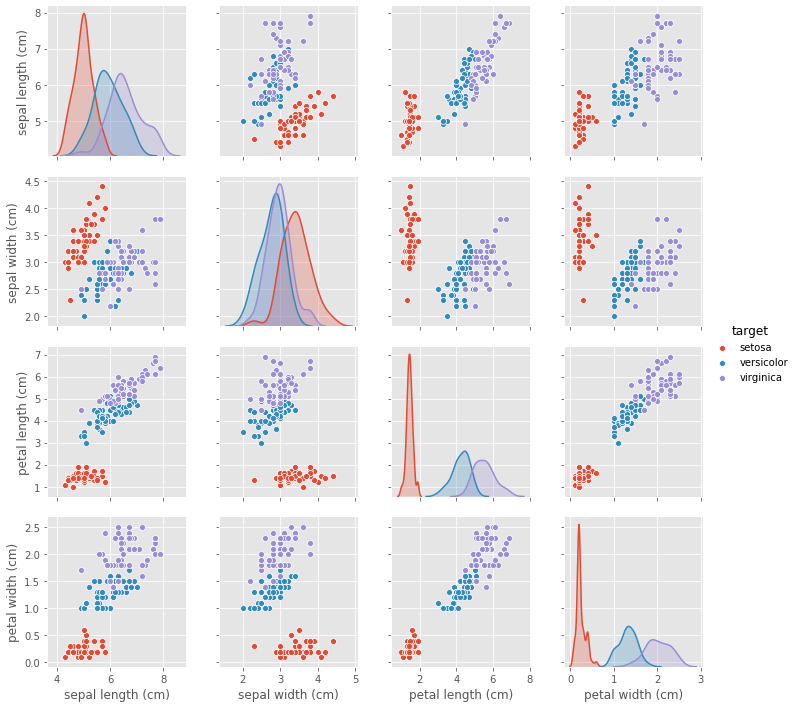

In [182]:
sns.pairplot(data=iris_frame, hue = 'target')
pyplot.show()

# Разбиение данных (sklearn.model_selection)

[model_selection](http://scikit-learn.org/stable/modules/cross_validation.html) используется для разбиения данных 

In [35]:
%pylab inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import datasets, model_selection
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## 1. Разовое разбиение данных на обучение и тест с помощью train_test_split

In [37]:
# Загрузка "игрушечного" датасета
iris = datasets.load_iris()

In [43]:
# Разбиение данных на тестовую и обучающую выборку. 
# Параметр test_size задает отношение тестовой выборки к обучающей.

train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, 
                                                                                    iris.target, 
                                                                                    test_size = 0.3)

## 2. Стратегии проведения кросс-валидации

Существуют различные [стратегии проведения кросс-валидации](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)

In [49]:
# Сгенерируем короткое подобие датасета, где элементы совпадают с порядковым номером
X = range(0,10)

### 2.1 KFold

Выборка делится на $k$ блоков примерно одинакового размера. Далее по очереди каждый из этих блоков используется в качестве тестового, а все остальные — в качестве обучающей выборки. Таким образом каждый блок $1$ раз участвует в тестировании и $k-1$ в обучении.

In [50]:
kf = model_selection.KFold(n_splits = 5)
for train_indices, test_indices in kf.split(X):
    print(train_indices, test_indices)

[2 3 4 5 6 7 8 9] [0 1]
[0 1 4 5 6 7 8 9] [2 3]
[0 1 2 3 6 7 8 9] [4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [51]:
# Параметр shuffle позволяет перемешать элементы выборок

kf = model_selection.KFold(n_splits = 2, shuffle = True)
for train_indices, test_indices in kf.split(X):
    print(train_indices, test_indices)

[0 2 4 7 9] [1 3 5 6 8]
[1 3 5 6 8] [0 2 4 7 9]


In [52]:
# Параметр random_state позволяет зафиксировать полученное разбиение выборки.
# Удобно использовать, когда необходимо показать воиспроизводимость проделанной работы.

kf = model_selection.KFold(n_splits = 2, shuffle = True, random_state = 1)
for train_indices, test_indices in kf.split(X):
    print(train_indices, test_indices)

[1 3 5 7 8] [0 2 4 6 9]
[0 2 4 6 9] [1 3 5 7 8]


### 2.2 StratifiedKFold

Отличием данного метода является сохранение соотношения классов в обучающих и тестовых подвыборках.

In [53]:
# Создадим список, где 5 нулевых и 5 единичных объектов (задача бинарной классификации)

y = np.array([0] * 5 + [1] * 5)
print(y, '\n')

skf = model_selection.StratifiedKFold(n_splits = 2, shuffle = True, random_state = 0)
for train_indices, test_indices in skf.split(X, y):
    print(train_indices, test_indices)

[0 0 0 0 0 1 1 1 1 1] 

[3 4 8 9] [0 1 2 5 6 7]
[0 1 2 5 6 7] [3 4 8 9]


В выводе примера выше train_indices = [3 4 8 9], где 3 и 4 - номер нулевых элементов в исходном множестве, 8 и 9 - номера единичных элементов исходного множества. Таким образом соотношение нулевых и единичных элементов в выборке сохранено как и у исходного множества.

In [54]:
target = np.array([0, 1] * 5)
print(target)

skf = model_selection.StratifiedKFold(n_splits = 2,shuffle = True)
for train_indices, test_indices in skf.split(X, target):
    print(train_indices, test_indices)

[0 1 0 1 0 1 0 1 0 1]
[4 5 8 9] [0 1 2 3 6 7]
[0 1 2 3 6 7] [4 5 8 9]


### 2.3 ShuffleSplit

Позволяет строить случайные перестановки. Таким методом можно получить множество выборок. При этом можно специфицировать размеры выборок и нет ограничений на то, сколько раз тот или иной объект может использоваться в качестве обучающего и тестирующего.

In [55]:
ss = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.2)

for train_indices, test_indices in ss.split(X):
    print(train_indices, test_indices)

[7 1 4 0 8 3 2 9] [5 6]
[3 9 5 7 8 0 2 6] [1 4]
[4 0 1 5 3 2 7 9] [6 8]
[7 4 5 6 2 8 1 3] [9 0]
[7 9 3 0 6 5 8 4] [1 2]
[6 0 1 8 3 5 9 2] [7 4]
[8 6 2 1 5 3 4 0] [9 7]
[7 2 6 9 1 0 4 5] [3 8]
[6 7 9 8 2 5 0 1] [4 3]
[4 2 0 8 9 5 7 1] [3 6]


### 2.4 StratifiedShuffleSplit

ShuffleSplit можно стратифицировать, в результате будет получены выборки, имеющие соотношение классов как у исходного набора данных

In [56]:
target = np.array([0] * 5 + [1] * 5)
print(target)

sss = model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2)
for train_indices, test_indices in sss.split(X, target):
    print(train_indices, test_indices)

[0 0 0 0 0 1 1 1 1 1]
[2 9 0 4 6 8 3 5] [7 1]
[0 9 1 3 6 8 5 2] [4 7]
[1 4 9 2 5 0 8 7] [3 6]
[7 6 8 4 9 2 1 0] [5 3]


### 2.5 Leave-One-Out

Позволяет оставить каждый объект в тесте один раз. Тестовая выборка состоит всегда из одного объекта и не повторяется.
Используется при небольших выборках данных.

In [57]:
loo = model_selection.LeaveOneOut()

for train_indices, test_index in loo.split(X):
    print(train_indices, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


# Линейные модели (sklearn.liner_model)

Модуль [sklearn.liner_model](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) позволяет строить линейные модели (см. [примеры](http://scikit-learn.org/stable/modules/linear_model.html#linear-model))

**sklearn.liner_model предоставляет следующие линейные модели классификации:**
* __RidgeClassifier__ - Линейный классификатор
* __LogisticRegression__ - Логистическая регрессия (выдает вероятности, с которыми объект принадлежит тому или иному классу)
* __SGDClassifier__ - Линейная классификация на основе стохастического градиентного спуска
* __etc__

**и модели линейной регрессии:**
* __SGDRegressor__ - Линейная регрессия на основе стохастического градиентного спуска
* __LinearRegression__ - Линейная регрессия
* __Lasso__ - Линейная регрессия с $L1$-регуляризацией (Lasso-регуляризация показывает хорошие результаты в задачах с большим количеством неинформативных признаков, обнуляя коэффициенты перед ними)
* __Ridge__ - Линейная регрессия с $L2$-регуляризацией
* __etc__

In [8]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Линейная классификация

**Генерация данных** для сравнения видов линейных моделей классификации

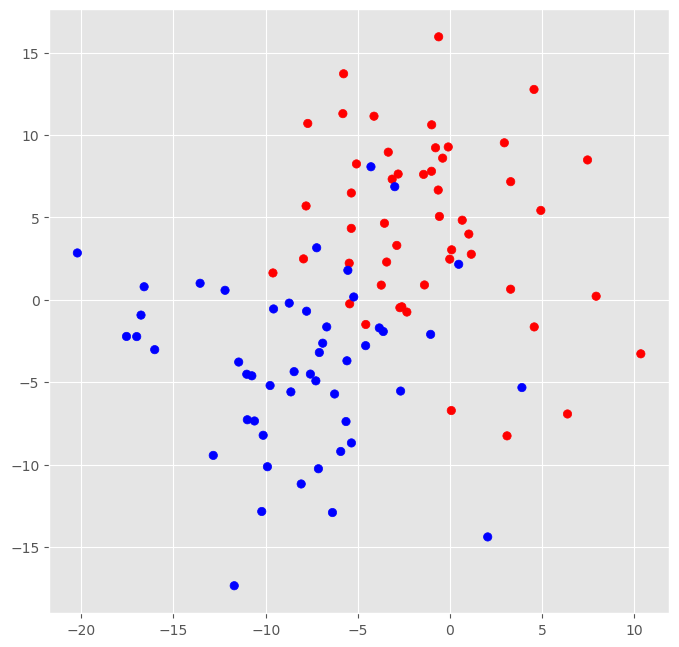

In [14]:
# Генерация данных. Функция make_blobs принимает количество классов (centers), разброс (cluster_std)
blobs = datasets.make_blobs(centers = 2, cluster_std =5.5, random_state=1)

# Визуализация данных
colors = ListedColormap(['red', 'blue'])


fig, nx = pyplot.subplots(figsize=(8, 8), dpi=100)

nx.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)
pyplot.show()

# Разбиение выборки на обучающую и тестовую
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### 1.1 RidgeClassifier (линейный классификатор)

In [65]:
# Создание объекта - классификатора (с парметрами по умолчанию)
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

# Обучение классификатора
ridge_classifier.fit(train_data, train_labels)

# Применение обученного классификатора (предсказанные значения классов)
ridge_predictions = ridge_classifier.predict(test_data)

In [66]:
# Значения тестовой выборки
print(test_labels)

# Предсказанные значения
print(ridge_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [67]:
# Оценка качества классификации (метрика качества accuracy_score пределяет долю правильных ответов на тестовой выборке)
metrics.accuracy_score(test_labels, ridge_predictions)

0.8666666666666667

In [69]:
# Найденные веса каждого признака
print(ridge_classifier.coef_)

# Коэффициент перед свободным членом 
print(ridge_classifier.intercept_)

[[-0.0854443  -0.07273219]]
[-0.31250723]


### 1.2 LogisticRegression (логистическая регрессия)

In [76]:
# Создание объекта - классификатора (с парметрами по умолчанию)
log_regressor = linear_model.LogisticRegression(random_state = 1)

# Обучение классификатора
log_regressor.fit(train_data, train_labels)

# Применение обученного классификатора (предсказанные значения классов)
lr_predictions = log_regressor.predict(test_data)

# Вероятности, с которыми объет принадлежит классу соответствующему
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [77]:
# Значения тестовой выборки
print(test_labels)

# Предсказанные значения
print(lr_predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [71]:
# Вероятности принадлежности пресказанных значений классам. 
# 1 столбик - вероятность принадлжености нулевому классу, 2 столбик - единичному
print(lr_proba_predictions)

[[0.99873457 0.00126543]
 [0.38956803 0.61043197]
 [0.45000737 0.54999263]
 [0.00536816 0.99463184]
 [0.70965944 0.29034056]
 [0.23304944 0.76695056]
 [0.98983143 0.01016857]
 [0.9709671  0.0290329 ]
 [0.93909394 0.06090606]
 [0.15103335 0.84896665]
 [0.90324667 0.09675333]
 [0.0100448  0.9899552 ]
 [0.82338574 0.17661426]
 [0.05238427 0.94761573]
 [0.00443451 0.99556549]
 [0.00102911 0.99897089]
 [0.20817393 0.79182607]
 [0.91074564 0.08925436]
 [0.22580526 0.77419474]
 [0.00101709 0.99898291]
 [0.09600944 0.90399056]
 [0.99367624 0.00632376]
 [0.9779897  0.0220103 ]
 [0.29889823 0.70110177]
 [0.00210487 0.99789513]
 [0.00929423 0.99070577]
 [0.2670277  0.7329723 ]
 [0.85210662 0.14789338]
 [0.98871444 0.01128556]
 [0.00407572 0.99592428]]


In [72]:
# Доля правильных ответов
print(metrics.accuracy_score(test_labels, lr_predictions))

0.8


### 1.3 SGDClassifier (линейная классификация на основе стохастического градиентного спуска)

In [129]:
# Создание объекта - классификатора.
# Функция потерь - вероятностный классификатор loss = 'log'
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

# Обучение классификатора
classifier.fit(train_data, train_labels)

# Применение обученного классификатора (предсказанные значения классов)
predictions = classifier.predict(test_data)

# Вероятности, с которыми объет принадлежит классу соответствующему
probability_predictions = classifier.predict_proba(test_data)

In [130]:
# Значения тестовой выборки
print(test_labels)

# Предсказанные значения
print(predictions)

[0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1]
[0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [131]:
# Вероятности принадлежности пресказанных значений классам. 
# 1 столбик - вероятность принадлжености нулевому классу, 2 столбик - единичному
print(probability_predictions)

[[1.00000000e+000 0.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [4.77680072e-007 9.99999522e-001]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 4.19941559e-295]
 [1.00000000e+000 1.37114231e-180]
 [1.00000000e+000 1.69131900e-153]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 9.02824019e-092]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 7.19168925e-032]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 6.07099389e-119]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 5.04763409e-301]
 [1.00000000e+000 9.40306516e-203]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 7.49281808e-094]
 [1.00000000e+000 4.

In [133]:
# Доля правильных ответов
print(metrics.accuracy_score(test_labels, predictions))

0.7666666666666667


## 2. Линейная регрессия

**Генерация данных** для сравнения видов линейных моделей регрессии

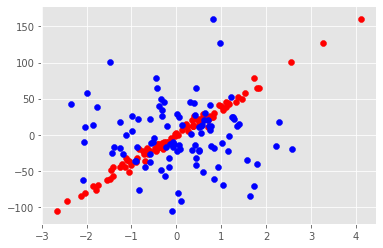

In [61]:
# Датасет с двумя признаками: один - информативный, второй - избыточный. 
# Параметр noise задает шум в данных.
# Параметр coef позволяет вывести уравнение приближаемой функции.

data, target, coef = datasets.make_regression(n_samples = 100, n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

# Визуализация данных
pyplot.scatter(data[:,0], target, color = 'r')
pyplot.scatter(data[:,1], target, color = 'b')
pyplot.show()

# Разбиение выборки на обучающую и тестовую
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                    test_size = 0.3)

### 2.1 LinearRegression (линейная регрессия)

In [53]:
# Создание объекта - модели линейной регресии
linear_regressor = linear_model.LinearRegression()

# Обучение модели линейной регрессии
linear_regressor.fit(train_data, train_labels)

# Предсказание значений целевой функции с помощью обученной модели
predictions = linear_regressor.predict(test_data)

Wall time: 7.55 s


In [39]:
# Значения исходной функции
print(test_labels, '\n')

# Предсказанные значения целевой функции
print(predictions)

[ -10.06708677 -105.77758163  -12.98848753   64.70214251  -91.477377
  -27.02798161   44.41658249  -48.28700118  -13.99339669   22.13032804
  -57.46293828   25.24428409  -71.3715844   -19.36956003   49.41686419
   34.35183007   -1.42235396   12.74038341  -40.84204295   18.17188553
  -44.51417742   21.20540389  -32.92158843   51.87072011  -22.32195021
  -15.01435792  -16.79027112  -22.33224966  -16.30914909    4.45578287] 

[ -10.809579   -104.48395426  -17.47622588   68.33526892  -95.67594458
  -26.36990615   44.1377348   -57.72671042  -15.93021129   19.57330417
  -56.3507284    14.14590136  -73.03042483  -33.31082499   55.74954228
   38.86710012   -1.41987083    6.53518733  -47.88061226   17.91463531
  -56.40587421   16.20390979  -35.3085539    52.4537819   -23.75259782
  -10.71671612  -15.75806878  -30.18460673  -13.01335682    8.44614556]


In [54]:
# Оценка качества модели по метрике отклонения предсказанного значения от исходного значения функции
metrics.mean_absolute_error(test_labels, predictions)

3.989051480156093

In [21]:
# Значения коэффициентов, вычисленных моделью
linear_regressor.coef_

# Свободный член функции, вычисленной моделью
linear_regressor.intercept_

# Уравнение функции, вычисленной моделью
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 37.97*x1 + 0.05*x2 + -1.30


Большой коэффициент первого значения и маленький второго свидетельствуют о том, что признак 0 (красный) информативный, а признак 1 (синий) избыточный

### 2.2 Lasso (линейная регрессия с L1-регуляризацией)

In [22]:
# Создание объекта - модели линейной регресии
lasso_regressor = linear_model.Lasso(random_state = 3)

# Обучение модели линейной регрессии
lasso_regressor.fit(train_data, train_labels)

# Предсказание значений целевой функции с помощью обученной модели
lasso_predictions = lasso_regressor.predict(test_data)

In [23]:
# Оценка качества модели по метрике отклонения предсказанного значения от исходного значения функции
metrics.mean_absolute_error(test_labels, lasso_predictions)

4.5115314047260275

In [25]:
# Оценка качества модели по кросс-валидации с использованием "собственной" метрики оценки качества
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, cv = 10)

print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 0.97890206212163, std: 0.019284739909349893


In [27]:
# Значения коэффициентов, вычисленных моделью
lasso_regressor.coef_

# Свободный член функции, вычисленной моделью
lasso_regressor.intercept_

# Уравнение функции, вычисленной моделью
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(lasso_regressor.coef_[0], 
                                                  lasso_regressor.coef_[1], 
                                                  lasso_regressor.intercept_))

y = 37.17*x1 + -0.00*x2 + -1.35


Lasso-регуляризация обнулила второй (неинформативный) коэффициент, что положительно влияет на качество модели.

### 2.3 SGDRegressor (линейная регрессия на основе стохастического градиентного спуска)

In [59]:
# Создание объекта - модели линейной регрессии на основе стохастического градиентного спуска
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

# Обучение модели линейной регрессии 
regressor.fit(train_data, train_labels)

# Предсказание значений целевой функции с помощью обученной модели
reg_predictions = regressor.predict(test_data)

Wall time: 30.4 s


In [60]:
# Оценка качества модели по метрике отклонения предсказанного значения от исходного значения функции
metrics.mean_absolute_error(test_labels, reg_predictions)

4.004308381343137

In [30]:
# Значения коэффициентов, вычисленных моделью
regressor.coef_

# Свободный член функции, вычисленной моделью
regressor.intercept_

# Уравнение функции, вычисленной моделью
print(f'y = {regressor.coef_[0]:.2f}*x1 + {regressor.coef_[1]:.2f}*x2 + {regressor.intercept_[0]:.2f}')

y = 37.14*x1 + -0.21*x2 + -1.47


### 2.4 Ridge (линейная регрессия с L2-регуляризацией)

# Байесовская классификация и регрессия

In [56]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import model_selection, datasets, linear_model, metrics
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Генерация данных** для сравнения видов линейных моделей классификации

In [57]:
"""Выборка с целыми неотрицательными значениями признаков (1797, 65)"""

# Загрузка встроенного "игрушечного" набора данных digits
digits = datasets.load_digits()

# Преобразование признакового описания в таблицу DataFrame
digits_frame = pd.DataFrame(digits.data)

# Добавление столбца классов
digits_frame['target'] = digits.target

X_1 = digits_frame.drop('target', axis=1)
y_1 = digits_frame['target']

In [58]:
"""Выборка с вещественными признаками (569, 31)"""

# Загрузка встроенного "игрушечного" набора данныхbreast_cancer
breast_cancer = datasets.load_breast_cancer()

# Преобразование признакового описания в таблицу DataFrame
breast_cancer_frame = pd.DataFrame(breast_cancer.data)

# Добавление имен столбцам признаков
breast_cancer_frame.columns = breast_cancer.feature_names

# Добавление столбца классов
breast_cancer_frame['target'] = breast_cancer.target

# Замена меток классов в DataFrame на их имена
breast_cancer_frame.target = breast_cancer_frame.target.apply(lambda x : breast_cancer.target_names[x])

X_2 = breast_cancer_frame.drop('target', axis=1)
y_2 = breast_cancer_frame['target']

## 1. Распределение Бернулли (BernoulliNB) в наивном байесовском классификаторе 

In [59]:
clf_BernoulliNB_1 = BernoulliNB().fit(X_1, y_1)

# Оценка модели классификации
scoring_BernoulliNB_1 = model_selection.cross_val_score(clf_BernoulliNB_1, X_1, y_1)

print(scoring_BernoulliNB_1.mean())

0.8258236507780582


In [60]:
clf_BernoulliNB_2 = BernoulliNB().fit(X_2, y_2)

# Оценка модели классификации
scoring_BernoulliNB_2 = model_selection.cross_val_score(clf_BernoulliNB_2, X_2, y_2)

print(scoring_BernoulliNB_2.mean())

0.6274204028589994


## 2. Мультиномиальное распределение (MultinomialNB) в наивном байесовском классификаторе

Мультиномиальное распределение показывает лучшее качество на выборке с целыми неотрицательными значениями признаков

In [61]:
clf_MultinomialNB_1 = MultinomialNB().fit(X_1, y_1)

# Оценка модели классификации
scoring_MultinomialNB_1 = model_selection.cross_val_score(clf_MultinomialNB_1, X_1, y_1)

print(scoring_MultinomialNB_1.mean())

0.8708771489735053


In [62]:
clf_MultinomialNB_2 = MultinomialNB().fit(X_2, y_2)

# Оценка модели классификации
scoring_MultinomialNB_2 = model_selection.cross_val_score(clf_MultinomialNB_2, X_2, y_2)

print(scoring_MultinomialNB_2.mean())

0.8945790401930752


## 3. Нормальное распределение (GaussianNB) в наивном байесовском классификаторе

Мультиномиальное распределение показывает лучшее качество на выборке с вещественными признаками

In [63]:
clf_GaussianNB_1 = GaussianNB().fit(X_1, y_1)

# Оценка модели классификации
scoring_GaussianNB_1 = model_selection.cross_val_score(clf_GaussianNB_1, X_1, y_1)

print(scoring_GaussianNB_1.mean())

0.8186003803550138


In [64]:
clf_GaussianNB_2 = GaussianNB().fit(X_2, y_2)

# Оценка модели классификации
scoring_GaussianNB_2 = model_selection.cross_val_score(clf_GaussianNB_2, X_2, y_2)

print(scoring_GaussianNB_2.mean())

0.9367492806089297


# Оценка качества моделей по кросс-валидации (sklearn.model_selection.cross_val_score)

In [123]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Генерация данных и модели** для оценки качества линейных моделей классификации по кросс-валидации

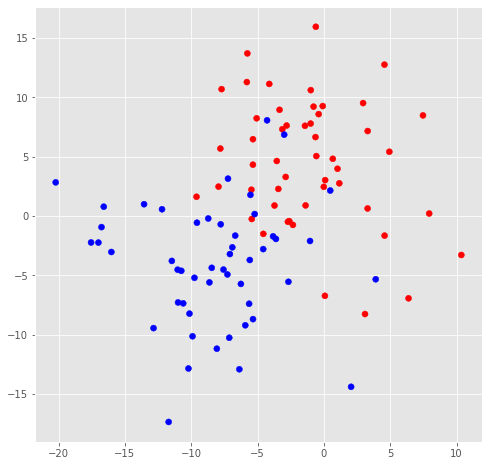

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# Генерация данных. Функция make_blobs принимает количество классов (centers), разброс (cluster_std)
blobs = datasets.make_blobs(centers = 2, cluster_std =5.5, random_state=1)

# Визуализация данных
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)
pyplot.show()

# Разбиение выборки на обучающую и тестовую
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

# Создание объекта - классификатора (с парметрами по умолчанию)
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

# Обучение классификатора
ridge_classifier.fit(train_data, train_labels)


# Создание объекта - классификатора (с парметрами по умолчанию)
log_regressor = linear_model.LogisticRegression(random_state = 1)

# Обучение классификатора
log_regressor.fit(train_data, train_labels)

**Генерация данных и модели** для оценки качества линейных моделей регрессии по кросс-валидации

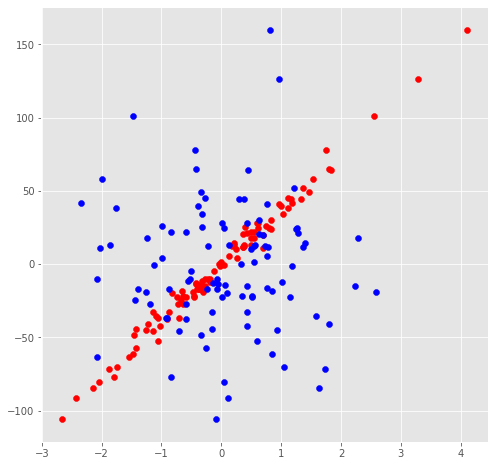

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=3,
      selection='cyclic', tol=0.0001, warm_start=False)

In [169]:
# Датасет с двумя признаками: один - информативный, второй - избыточный. 
# Параметр noise задает шум в данных.
# Параметр coef позволяет вывести уравнение приближаемой функции.

data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

# Визуализация данных
pylab.scatter(data[:,0], target, color = 'r')
pylab.scatter(data[:,1], target, color = 'b')
pyplot.show()

# Разбиение выборки на обучающую и тестовую
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                    test_size = 0.3)

# Создание объекта - модели линейной регресии
linear_regressor = linear_model.LinearRegression()

# Обучение модели линейной регрессии
linear_regressor.fit(train_data, train_labels)


# Создание объекта - модели линейной регресии с L1-регуляризацией
lasso_regressor = linear_model.Lasso(random_state = 3)

# Обучение модели линейной регрессии с L1-регуляризацией
lasso_regressor.fit(train_data, train_labels)

## 1. Кросс-валидация стандартная

Функция cross_val_score принимает модель, которую необходимо оценить, данные и метки классов, метрику и метод кросс-валидации.

In [107]:
# Оценка модели линейной классификации
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

# scoring = accuracy - Метрика качества "доля правильных ответов"
# cv = 10 - стандартная кросс-валидация на 10 фолдов (KFold или StratifiedKFold)
# Для бинарной стратификации по умолчанию используется StratifiedKFold

# Параметры оценок метрики
print(f'mean:\t{round(ridge_scoring.mean(), 3)} \nmax:\t{ridge_scoring.max()} \
      \nmin:\t{ridge_scoring.min()} \nstd:\t{round(ridge_scoring.std(), 3)}')

mean:	0.88 
max:	1.0       
min:	0.7 
std:	0.087


In [109]:
# Оценка модели логистической регрессии
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

# Параметры оценок метрики
print(f'mean:\t{round(lr_scoring.mean(), 3)} \nmax:\t{lr_scoring.max()} \
      \nmin:\t{lr_scoring.min()} \nstd:\t{round(lr_scoring.std(), 3)}')

mean:	0.87 
max:	1.0       
min:	0.7 
std:	0.1


In [111]:
# Оценка модели линейной регрессии
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring = 'neg_mean_absolute_error', 
                                                  cv = 10)

# Параметры оценок метрики
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779698, std: 1.073710449289019


## 2. Кросс-валидация с заданной метрикой качества (scorer) и стратегией (cv_strategy)

Объект __`scorer`__ позволяет использовать собственную метрику качества. Для этого она должна принимать три параметра:
* оцениваемую модель; 
* набор метаклассов; 
* набор предсказаний.

Например, __`metrics.accuracy_score`__ не соотвествует данным условиям. Она принимает на вход только метрики классов 
и предсказания, но не принимает классификатор.

Создать _правильный_ объект scorer можно при помощи функции __`make_scorer`__.

In [112]:
scorer = metrics.make_scorer(metrics.accuracy_score)

Задание собственной стратегии кросс-валидации

In [113]:
# Используем StratifiedShuffleSplit на 20 итераций с долей тестовой выборки 30%

cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size = 0.3, random_state = 2)
cv_strategy.get_n_splits(blobs[1])

20

In [115]:
# Оценка модели линейной классификации
ridge_scoring = model_selection.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

# Параметры оценок метрики
print(f'mean:\t{round(ridge_scoring.mean(), 3)} \nmax:\t{round(ridge_scoring.max(), 3)} \
      \nmin:\t{round(ridge_scoring.min(), 3)} \nstd:\t{round(ridge_scoring.std(), 3)}')

mean:	0.87 
max:	1.0       
min:	0.767 
std:	0.06


In [117]:
# Оценка модели логистической регрессии
lr_scoring = model_selection.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

# Параметры оценок метрики
print(f'mean:\t{round(lr_scoring.mean(), 3)} \nmax:\t{round(lr_scoring.max(), 3)} \
      \nmin:\t{round(lr_scoring.min(), 3)} \nstd:\t{round(lr_scoring.std(), 3)}')

mean:	0.877 
max:	1.0       
min:	0.767 
std:	0.062


In [122]:
# Создание объекта scorer, в котором определяется, приоритет роста значения метрики (это избавит от знака "минус")
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

# Оценка качества модели линейной регрессии по кросс-валидации с использованием "собственной" метрики качества
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)

# Параметры оценок метрики
print(f'mean:\t{round(linear_scoring.mean(), 3)} \nstd:\t{round(linear_scoring.std(), 3)}')

mean:	4.07 
std:	1.074


In [174]:
# Оценка качества модели линейной регресии с L1-регуляризацией по кросс-валидации с использованием "собственной" метрики качества
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)

print(f'mean:\t{lasso_scoring.mean():.2f} \nstd:\t{lasso_scoring.std():.2f}')

mean:	4.15 
std:	1.02


# Метрики качества (sklearn.metrics)

Модуль [sklearn.metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) предоставляет готовую реализацию большинства метрик, использующихся в задачах классификации и регресии

In [2]:
%pylab inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## 1. Метрики качества в задачах классификации

**Генерация данных и модели** для сравнения различных метрик качества в задачах классификации

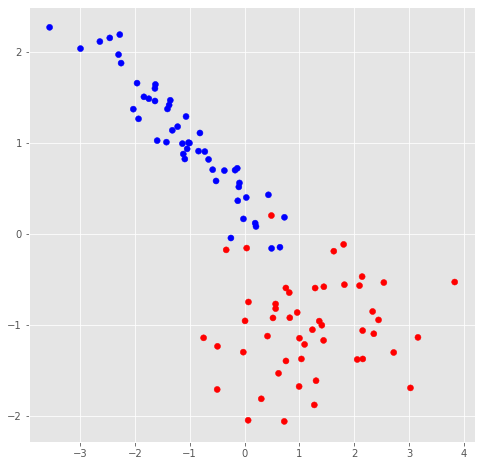

In [134]:
# Датасет из двух признаков для линейной классификации. Оба признака информативные
clf_data, clf_target = datasets.make_classification(n_features = 2, n_informative = 2, n_classes = 2, 
                                                    n_redundant = 0, n_clusters_per_class = 1, 
                                                    random_state = 7)

# Визуализация данных
colors = ListedColormap(['red', 'blue'])
pylab.scatter(clf_data[:,0], clf_data[:,1], c = clf_target, cmap = colors)
pyplot.show()

# Разбиение данных на обучающую и тестовую выборки
clf_train_data, clf_test_data, clf_train_labels, clf_test_labels = model_selection.train_test_split(clf_data, clf_target,
                                                                                     test_size = 0.3, random_state = 1)

# Создание объекта - классификатора
# Классификатор - линейнная классификацию на основе стохастического градиентного спуска - SGDClassifier
# Функция потерь - вероятностный классификатор loss = 'log'
classifier = linear_model.SGDClassifier(loss = 'log', random_state = 1, max_iter=1000)

# Обучение классификатора
classifier.fit(clf_train_data, clf_train_labels)

# Применение обученного классификатора. Получение метаклассов.
predictions = classifier.predict(clf_test_data)

# Определение вероятностей, с которыми объет принадлежит классу
probability_predictions = classifier.predict_proba(clf_test_data)

### 1.1 accuracy (доля правильных ответов)

В задачах классификации принято выбирать метрики таким образом, чтобы их нужно было максимизировать, тогда как в задачах регрессии — так, чтобы их нужно было минимизировать. Поэтому определяют:

$$accuracy\left(a,\ X\right)=\frac{1}{\ell}\sum_{i=1}^{\ell}\left[a\left(x_i\right)=y_i\right]$$

Эта метрика качества проста и широко используется, однако имеет несколько существенных недостатков:
- Первая проблема связана с несбалансированными выборками.
- Вторая проблема в том, что она никак не учитывает разные цены разны типов ошибок. Тогда как цены действительно могут быть разными.

In [135]:
# Функция accuracy_score принимает метки тестовой выборки clf_test_labels и предсказанные метки predictions
metrics.accuracy_score(clf_test_labels, predictions)

0.9333333333333333

In [136]:
# Реализация собственной метрики accuracy_score
sum([1. if pair[0] == pair[1] else 0. for pair in zip(clf_test_labels, predictions)])/len(clf_test_labels)

0.9333333333333333

### 1.2 confusion matrix (матрица ошибок)

confusion matrix - матрица размером [Количество классов]x[Количество классов]. В позиции ij стоит элемент, который характеризует количество объектов, которые изначально имели метку i, но им присвоили метку j. Таким образом на главной диагонали находятся элементы, характеризующие объкты, для котороых предсказание верно, вне диагонали - элементы, характеризующие количество объектов, на которых была допущена ошибка.

In [133]:
# Функция confusion_matrix принимает метки тестовой выборки clf_test_labels и предсказанные метки predictions
matrix = metrics.confusion_matrix(clf_test_labels, predictions)
print(matrix)

[[17  1]
 [ 1 11]]


В данном примере верно предсказано 17 элементов нулевого класса и неверно 1 элемент нулевого;

верно предсказано 11 элементов единичного класса, неверно 1 элемент единичного класса.

Матрица [[17 1][1 11]] это отображает

На основе confusion matrix удобно расчитывать __точность__ (precision), __полноту__ (recall) и __f-меру__.

### 1.3 precision (точность классификаци)

In [136]:
# Точность отнесения элементов к нулевому классу.
# Необходимо явно указать pos_label = 0, поскольку 
# по умолчанию используется pos_label = 1 (точность отнесения элементов к первому классу)
metrics.precision_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [137]:
# Точность отнесения элементов к первому классу
metrics.precision_score(clf_test_labels, predictions)

0.9166666666666666

### 1.4 recall (полнота классификации)

In [138]:
# Полнота классификации для нулевого класса
metrics.recall_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [139]:
# Полнота классификации для единичного класса
metrics.recall_score(clf_test_labels, predictions)

0.9166666666666666

### 1.5 f1-мера

In [140]:
# f-мера для нулевого класса
metrics.f1_score(clf_test_labels, predictions, pos_label = 0)

0.9444444444444444

In [141]:
# f-мера для единичного класса
metrics.f1_score(clf_test_labels, predictions)

0.9166666666666666

### 1.6 classification report (сводка по точности, полноте и f-мере каждого класса)

In [142]:
print(metrics.classification_report(clf_test_labels, predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### 1.7 ROC curve (ROC кривая)

Для построения ROC curve предсказанные объекты сортируются по предсказанной величине, делятся на несколько групп по некоторым порогам отсечения. Внутри каждой группы оцениваются True Positive Rate и False Positive Rate. По полученным координатам строится  ROC curve.

In [144]:
# Функция roc_curve принимает на вход правильные метки классов и предсказанные ответы на этих классах.
# В данном примере лучше воспользоваться вероятностными ответами probability_predictions, 
# поскольку в них задан пболее точный порядок.
# probability_predictions[:,1] задает вероятности отнесения объектов к первому классу
# Использование символа _ означает, что трешхолды использоваться не будут
fpr, tpr, _ = metrics.roc_curve(clf_test_labels, probability_predictions[:,1])

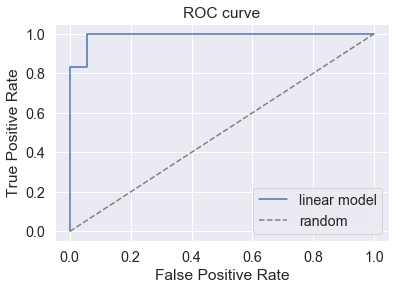

In [145]:
# x - fpr, y - tpr
pylab.plot(fpr, tpr, label = 'linear model')
# ROC curve, соответствующая случайной классификации (диагональная прямая)
pylab.plot([0, 1], [0, 1], '--', color = 'grey', label = 'random')
# Границу для осей x и y
pylab.xlim([-0.05, 1.05])
pylab.ylim([-0.05, 1.05])
pylab.xlabel('False Positive Rate')
pylab.ylabel('True Positive Rate')
pylab.title('ROC curve')
pylab.legend(loc = "lower right")
pyplot.show()

### 1.8 ROC AUC (площадь под ROC-кривой)

In [146]:
# Оценим ROC AUC для предсказаний в виде меток
metrics.roc_auc_score(clf_test_labels, predictions)

0.9305555555555554

In [147]:
# Оценим ROC AUC для предсказаний в виде вероятностей
metrics.roc_auc_score(clf_test_labels, probability_predictions[:,1])

0.9907407407407407

ROC AUC для предсказаний в виде меток показывает худший результат, т.к. метки могут идти в произольном порядке

### 1.9 Precision AUC

In [148]:
metrics.average_precision_score(clf_test_labels, predictions)

0.873611111111111

### 1.10 log_loss (метрика логистических потерь)

Для оценки вероятностных классификаторов часто используется метрика логистических потерь log_loss

(Чем меньше значение метрики, тем лучше оценка)

In [149]:
metrics.log_loss(clf_test_labels, probability_predictions[:,1])

0.21767621111290084

## 2. Метрики качества в задачах регрессии

**Генерация данных и модели** для сравнения различных метрик качества в задачах регрессии

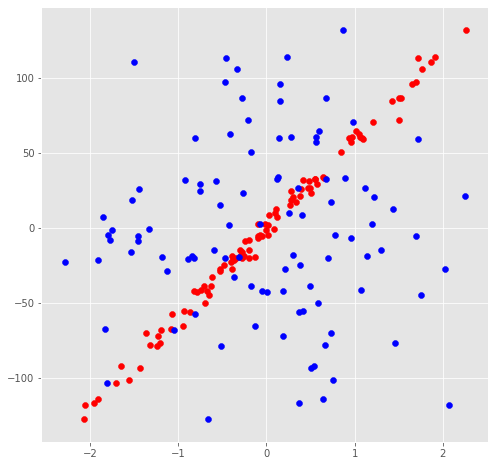

In [175]:
# Датасет из двух признаков для линейной регрессии. Один информативный, второй избыточный
reg_data, reg_target = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                                noise = 5., random_state = 7)

# Визуализация данных координатах признак-целевая функции (признак 0 - шумовой, 1 - информативный)
pylab.scatter(reg_data[:,1], reg_target, color = 'r')
pylab.scatter(reg_data[:,0], reg_target, color = 'b')
pyplot.show()

# Разбиение данных на обучающую и тестовую выборки
reg_train_data, reg_test_data, reg_train_labels, reg_test_labels = model_selection.train_test_split(reg_data, reg_target,
                                                                                     test_size = 0.3, random_state = 1)

# Создание объекта - модели линейной регрессии на основе стохастического градиентного спуска - SGDRegressor
regressor = linear_model.SGDRegressor(random_state = 1, max_iter = 20)

# Обучение модели линейной регрессии
regressor.fit(reg_train_data, reg_train_labels)

# Применение обученной модели
reg_predictions = regressor.predict(reg_test_data)

### 2.1 mean squared error (среднеквадратичная ошибка)

$$MSE\left(a,\ X\right)=\frac{1}{\ell}\sum_{i=1}^{\ell}\left(a\left(x_i\right)-y_i\right)^2$$

Такой функционал легко оптимизировать, используя, например, метод градиентного спуска.

Он сильно штрафует за большие ошибки, так как отклонения возводятся в квадрат. Это приводит к тому, что штраф на выбросе будет очень сильным, и алгоритм будет настраиваться на выбросы. Другими словами, алгоритм будет настраиваться на такие объекты, на которые не имеет смысл настраиваться.

In [156]:
metrics.mean_squared_error(reg_test_labels, reg_predictions)

24.114925597460914

### 2.2 mean absolute error (средняя абсолютная ошибка)

$$MAE\left(a,\ X\right)=\frac{1}{\ell}\sum_{i=1}^{\ell}\left|a\left(x_i\right)-y_i\right|$$

Этот функционал сложнее минимизировать, чем среднеквадратичную ошибку, так как у модуля производная не существует в нуле. Но у такого функционала больше устойчивость к выбросам, так как штраф за сильное отклонение гораздо меньше.

In [155]:
metrics.mean_absolute_error(reg_test_labels, reg_predictions)

3.748761311885298

### 2.3 root mean squared error (корень среднеквадратичного отклонения)

In [157]:
sqrt(metrics.mean_squared_error(reg_test_labels, reg_predictions))

4.91069502183356

### 2.4 r2 score (коэффициент детерминации)

$$R^2\left(a,\ X\right)=1-\frac{\sum_{i=1}^{\ell}\left(a\left(x_i\right)-y_i\right)^2}{\sum_{i=1}^{\ell}\left(y_i-\bar{y}\right)},\ \ \bar{y}=\frac{1}{\ell}\sum_{i=1}^{\ell}y_i$$

Коэффициент детерминации $R^2\left(a,\ X\right)$ позволяет интерпретировать значение среднеквадратичной ошибки. Этот коэффициент показывает, какую долю дисперсии (разнообразия ответов) во всем целевом векторе $y$ модель смогла объяснить.

Для разумных моделей коэффициент детерминации лежит в следующих пределах:

$$0\le R^2\le1$$

причем случай $R^2=1$ соответствует случаю идеальной модели, $R^2=0$ — модели на уровне оптимальной «константной», а $R^2<1$ — модели хуже «константной» (такие алгоритмы никогда не нужно рассматривать). Оптимальным константым алгоритмом называется такой алгоритм, который возвращает всегда среднее значение ответов $\bar{y}$ для объектов обучающей выборки.

In [158]:
metrics.r2_score(reg_test_labels, reg_predictions)

0.989317615054695

# Поиск по сетке (sklearn.grid_search)

[Модуль sklearn.grid_search](http://scikit-learn.org/stable/modules/grid_search.html) позволяет подбирать параметры модели по сетке.

In [184]:
%pylab inline
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


**Генерация данных** для демонстрации принципа поиска по сетке

In [185]:
# Загрузка встроенного "игрушечного" набора данных "Ирисы Фишера"
iris = datasets.load_iris()

# Разбиение данных на обучающую и тестовую выборки
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                    test_size = 0.3, random_state = 0)

**Задание модели** для которой будет производиться подбор параметров

In [186]:
# Задание модели классификации - SGD классификатор
classifier = linear_model.SGDClassifier(random_state = 0, tol=1e-3)

**Задание параметров** по которым будет производиться поиск оптимального качества модели

In [187]:
# Метод .get_params() позволяет вывести все параметры модели
classifier.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [197]:
# Словарь, содержащий наборы рассматриваемых параметров - сетка

# Словарю передается:
# - вид функции потерь (loss), 
# - вид регуляризации (penalty),
# - количество итераций (max_iter) (по умолчанию 5)
# - коэффициент регуляризаци alpha (по умолчанию 0.0001)
# - и т.д.

parameters_grid = {
    'loss' : ['hinge', 'log', 'squared_hinge', 'squared_loss'],
    'penalty' : ['l1', 'l2'],
    'max_iter' : np.arange(5,10),
    'alpha' : np.linspace(0.0001, 0.001, num = 5),
}

# Итого 200 точек

**Задание стратегии кросс-валидации**

In [198]:
# Стратегия кросс-валидации для оценки качества
cv = model_selection.StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 0)

## 1. Grid search (полный поиск по сетке)

In [199]:
# Создание объекта GridSearch для подбора параметров полным поиском по сетке

# Объекту передается: 
# - модель для оптимизации (classifier)
# - сетка с параметрами (parameters_grid)
# - метрика проверки качества (scoring)
# - стратегия кросс-валиадции (cv)

# Таким образом, будет произведен поиск лучшей с точки зрения метрики accuracy модели, 
# оцененой с помощью кросс-валидации StratifiedShuffleSplit

grid_cv = model_selection.GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv)

In [200]:
%%time

# Обучение сетки
grid_cv.fit(train_data, train_labels)

Wall time: 5.7 s


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
             error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=...
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.0001  , 0.000325, 0.00055 , 0.000775, 0.001   ]),
                         'loss': ['hinge', 'log', 'squared_hinge',
                 

In [204]:
# Вывод лучшего найденного классификатора
print(grid_cv.best_estimator_)

# Оценка классификатора на лучшем наборе параметров
print(grid_cv.best_score_)

# Лучший набор параметров в виде словаря
print(grid_cv.best_params_)

# Оценки на всех возможных наборах
# print(grid_cv.cv_results_)

SGDClassifier(alpha=0.0007750000000000001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=9,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=0, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)
0.9047619047619048
{'alpha': 0.0007750000000000001, 'loss': 'hinge', 'max_iter': 9, 'penalty': 'l1'}


## 2. Randomized grid search (случайный поиск по сетке)

Использование стратегии перебора всех значений по сетке не всегда оптимально ввиду необходимости больших расчетных мощностей при переборе большого количества параметров сетки и/или больших объемов данных.

Случайный поиск по сетке позволяет отказаться от полного перебора всех параметров. Оценка качества модели в некоторых случайных точках сетки позволяет провести предварительную оценку некоторых параметров и сузить область поиска - откинуть заведомо неоптимальные параметры. 

In [209]:
# Создание объекта RandomizedSearchCV для подбора параметров случайным поиском по сетке

# Объекту передается:
# - модель для оптимизации (classifier)
# - сетка с параметрами (parameters_grid)
# - матрика проверки качества (scoring)
# - стратегия кросс-валиадции (cv)
# - желаемое количество итераций (n_iter), т.е. количество точек по сетке

randomized_grid_cv = model_selection.RandomizedSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = cv, n_iter = 20, 
                                                   random_state = 0)

In [210]:
%%time

# Обучение сетки
randomized_grid_cv.fit(train_data, train_labels)

Wall time: 417 ms


RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None),
                   error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n...
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributions={'alpha': array([0.0001  , 0.000

In [212]:
# Вывод лучшего найденного классификатора
print(randomized_grid_cv.best_estimator_)

# Оценка классификатора на лучшем наборе параметров
print(randomized_grid_cv.best_score_)

# Лучший набор параметров в виде словаря
print(randomized_grid_cv.best_params_)

# Оценки на всех возможных наборах
# print(randomized_grid_cv.cv_results_)

SGDClassifier(alpha=0.0007750000000000001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='squared_hinge',
              max_iter=8, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
0.8666666666666667
{'penalty': 'l1', 'max_iter': 8, 'loss': 'squared_hinge', 'alpha': 0.0007750000000000001}


Далее можно остановиться на найденном случайном варианте набора параметров или продолжить поиск уже из найденной точки.

# Решающие деревья (sklearn.tree)

Модуль [sklearn.treel](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree) позволяет строить модели решающих деревьев (см. [примеры](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree))



In [1]:
%pylab inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import model_selection, datasets, metrics, tree

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


**Генерация данных** для демонстрации работы модели решающих деревьев

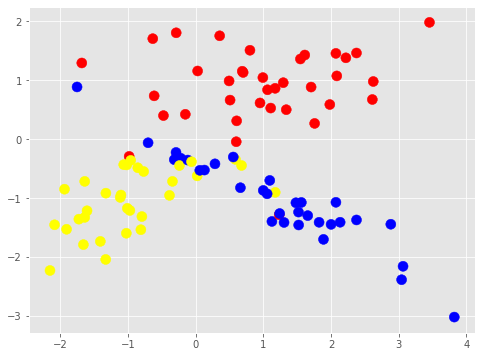

In [3]:
# Генерация датасета для многоклассовой классификации (2 признака, 3 класса)
classification_problem = datasets.make_classification(n_features = 2, n_informative = 2, 
                                                      n_classes = 3, n_redundant=0, 
                                                      n_clusters_per_class=1, random_state=3)

# ColorMap
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

# Визуализация данных
pylab.figure(figsize=(8,6))
pylab.scatter(list(map(lambda x: x[0], classification_problem[0])), list(map(lambda x: x[1], classification_problem[0])), 
              c=classification_problem[1], cmap=colors, s=100)

# Разбиение данных на обучение и тест
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(classification_problem[0], 
                                                                                     classification_problem[1], 
                                                                                     test_size = 0.3,
                                                                                     random_state = 1)

## 1. DecisionTreeClassifier (классификация решающими деревьями)

In [4]:
# Создание модели
clf = tree.DecisionTreeClassifier(random_state=1)

# Обучение модели
clf.fit(train_data, train_labels)

# Построение предсказаний по обученной модели по отложенному тесту
predictions = clf.predict(test_data)

In [5]:
# Оценка качества при помощи метрики качества
metrics.accuracy_score(test_labels, predictions)

0.7666666666666667

### 1.1 Оценка качества работы модели и вида разделяющей плоскости в зависимости от параметров дерева

**Визуализация разделяющей поверхности** модели решающего дерева

In [9]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    pyplot.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    pyplot.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    pyplot.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    pyplot.subplot(1,2,2)
    pyplot.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    pyplot.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    pyplot.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

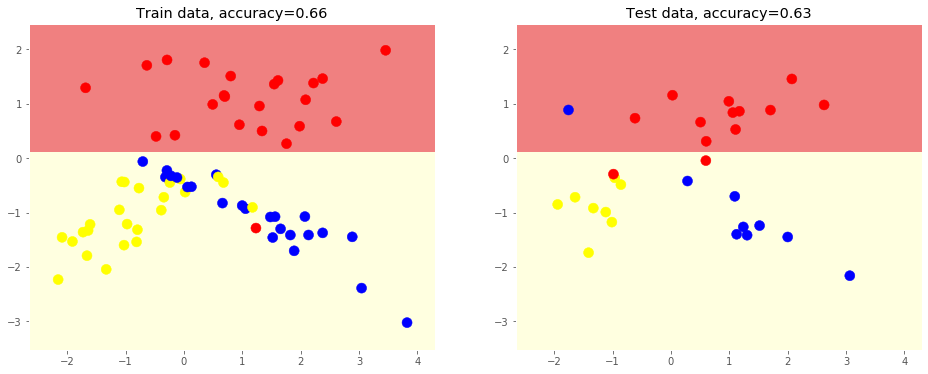

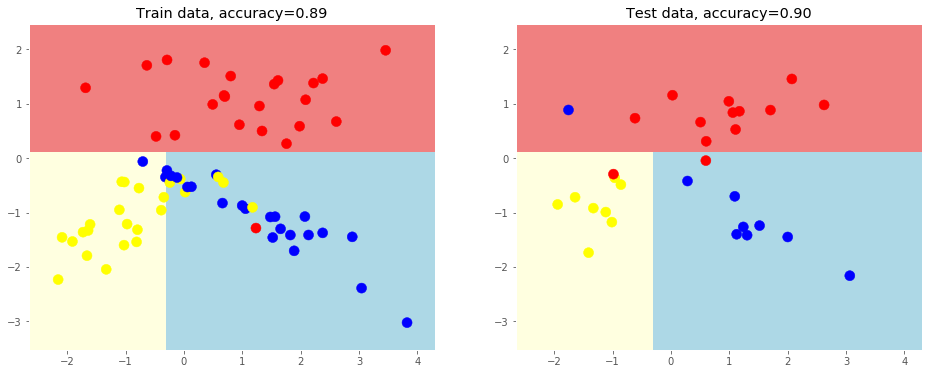

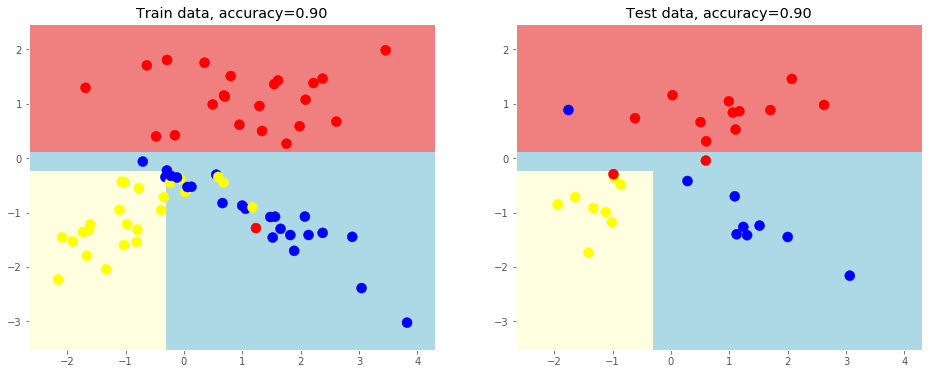

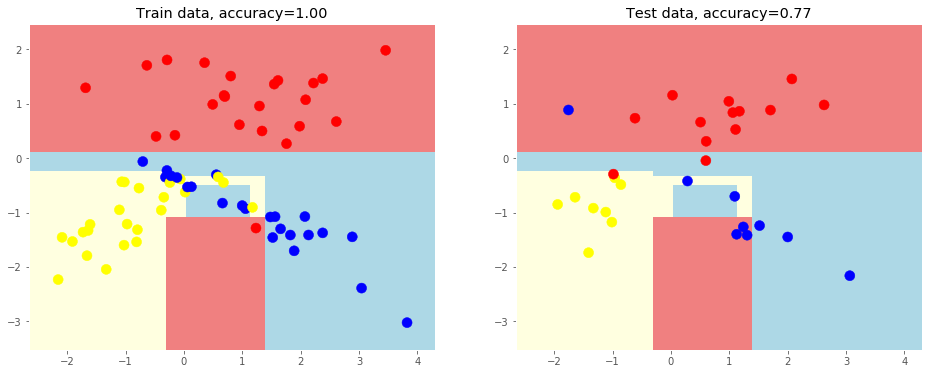

In [11]:
# Критерий останова - ограничение максимальной глубины дерева

for max_depth in [1, 2, 3, None]:
    # Модель классификатора
    estimator = tree.DecisionTreeClassifier(random_state = 1, max_depth = max_depth)
    
    # Визуализация работы классификатора
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

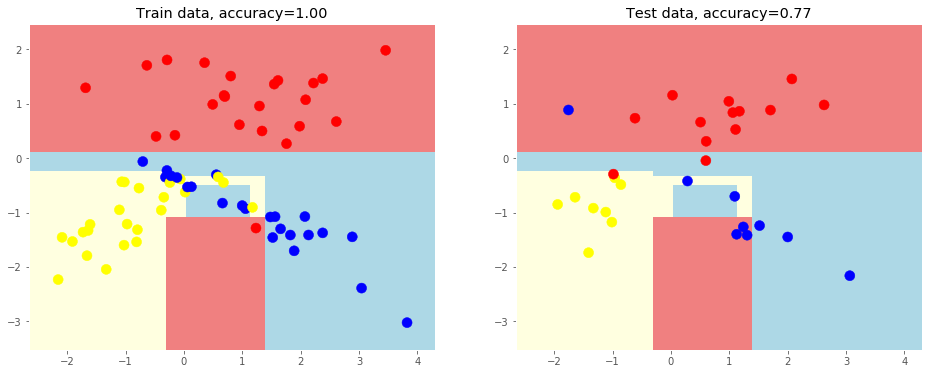

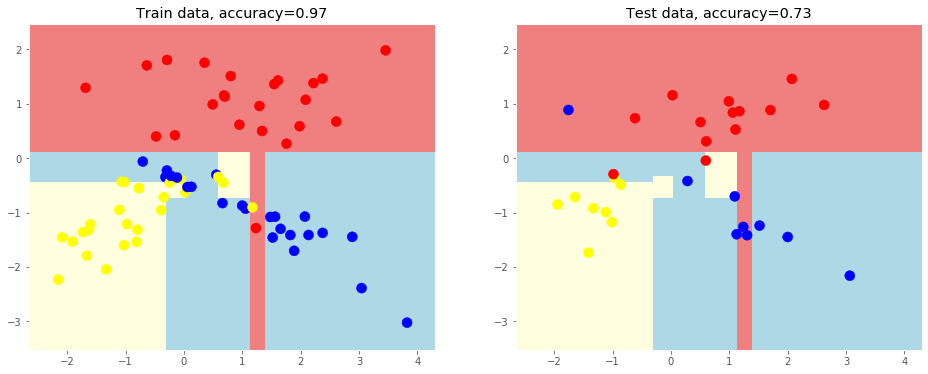

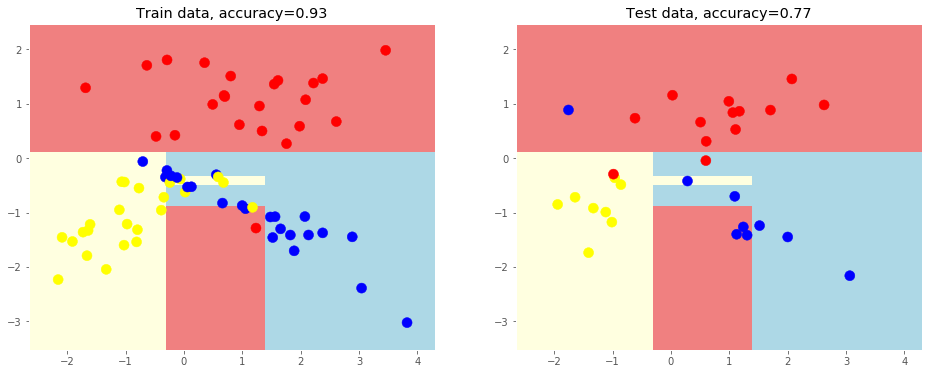

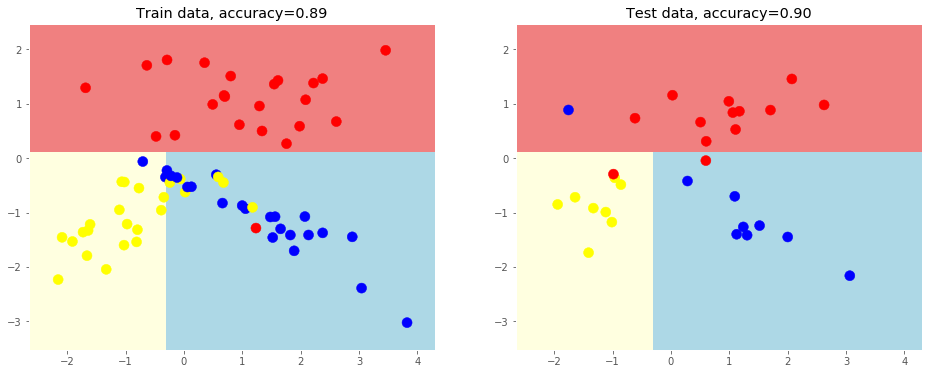

In [14]:
for min_samples_leaf in [1, 2, 3, 10]:
    # Модель классификатора
    estimator = tree.DecisionTreeClassifier(random_state = 1, min_samples_leaf=min_samples_leaf)
    
    # Визуализация работы классификатора
    plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)    

## 2. DecisionTreeRegressor (регрессия решающими деревьями)

# Случайные леса (sklearn.ensemble)

[Документация](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [69]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

from matplotlib import pyplot
from matplotlib.colors import ListedColormap

from sklearn import datasets, ensemble, tree, model_selection, metrics
import xgboost as xgb

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

## 1. RandomForestClassifier (классификация случайным лесом)

### 1.1 Бинарная классификация (оценка качества работы модели с различной глубиной деревьев)

**Загрузка данных** для демонстрации работы моделей случайного леса

[Данные](https://www.kaggle.com/c/bioresponse/data) взяты из [задачи на kaggle](https://www.kaggle.com/c/bioresponse). По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response). Признаки нормализаваны.

In [74]:
data = pd.read_csv('bioresponse.csv', header=0, sep=',')

# Выделение целевой переменной
y = data['Activity'].values

# Выделение признакового пространства
X = data.iloc[:, 1:]

# Распределение объектов по классам

print('Соотношение классов:')
for i in sorted(set(y)):
    print(i, ':', y[y==i].shape[0])

Соотношение классов:
0 : 1717
1 : 2034


**Деревья небольшой глубины**

In [75]:
# Модель случайного леса с 50-ю деревьями, каждое глубиной не более 2
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 2, random_state = 1)

# Функция learning_curve принимает на вход алгоритм, набор признаков, целевую функцию, пропорцию обучающей и тестовой выборок. 
# Возарвщает размер обучающей выборки, оценку качества на обучающем наборе данных, оценку качества на тестовом наборе данных

# Проанализируем следующие соотношения обучающей и тестовой выборок train_sizes - от 0.1 до 1 с шагом 0.2
# Метрика оценки качества - 'accuracy'. Кросс-валидация на 3 фолда

train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth, 
                                                                        X,
                                                                        y, 
                                                                        train_sizes=np.arange(0.1, 1, 0.2), 
                                                                        cv=3, scoring='accuracy')

Размер обучающей	Средняя оценка на 	Средняя оценка на
выборки			обучающей выборке 	тестовой выборке
250			0.749 			0.624
750			0.713 			0.642
1250			0.685 			0.654
1750			0.691 			0.662
2250			0.690 			0.667


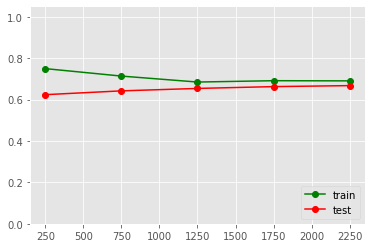

In [77]:
# График зависимости качества модели на обучающей и на тестовой выборках от объема обучающей выборки

pyplot.grid(True)
pyplot.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')

print('Размер обучающей\tСредняя оценка на \tСредняя оценка на')
print('выборки\t\t\tобучающей выборке \tтестовой выборке')
for size, train_score, test_score in zip(train_sizes, train_scores.mean(axis = 1), test_scores.mean(axis = 1)):
    print(f'{size}\t\t\t{train_score:.3f} \t\t\t{test_score:.3f}')

Из графика видно, что качество модели на обучающей выборке падает с увеличением объема обучающей выбрки до некоторого порога (1250), далее практически не изменяется. На тестовой выборке качество растет с увеличением объема обучающей выборки до некотрого порога (1250), далее практически не изменяется. Из этого следует, что увеличение объема обучающей выборки более некоторого порога (1250) практически не сказывается на точности модели. Модель данной сложности не может быть улучшена за счет увеличения объема данных обучающей выборки.

**Деревья большей глубины**

In [16]:
# Модель случайного леса с 50-ю деревьями, каждое глубиной не более 10
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [17]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier, 
                                                                        X, 
                                                                        y, 
                                                                        train_sizes=np.arange(0.1,1, 0.2), 
                                                                        cv=3, scoring='accuracy')

Размер обучающей	Средняя оценка на 	Средняя оценка на
выборки			обучающей выборке 	тестовой выборке
250			1.000 			0.670
750			0.987 			0.740
1250			0.969 			0.753
1750			0.956 			0.766
2250			0.939 			0.775


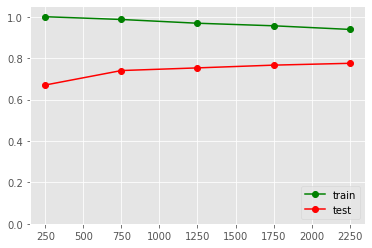

In [21]:
# График зависимости качества модели на обучающей и на тестовой выборках от объема обучающей выборки

pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

print('Размер обучающей\tСредняя оценка на \tСредняя оценка на')
print('выборки\t\t\tобучающей выборке \tтестовой выборке')
for size, train_score, test_score in zip(train_sizes, train_scores.mean(axis = 1), test_scores.mean(axis = 1)):
    print(f'{size}\t\t\t{train_score:.3f} \t\t\t{test_score:.3f}')

Из графика видно, что с ростом объема обучающей выборки качество модели на тесте растет на всей области. Качество модели на обучающей выборке падает с ростом объема обучающей выборки. Для модели данной сложности виден рост качества от роста объема обучающей выборки.

### 1.2 Многоклассовая классификация оОценка качества работы классификатора RandomForestClassifier)

**Генерация данных** для сравнения качества моделей классификации

In [78]:
# Загрузка датасета
data = datasets.load_digits()

# Пространство признаков
X = data.data

# Целевая функция
y = data.target

print('Соотношение классов:')
for i in sorted(set(y)):
    print(i, ':', y[y==i].shape[0])

Соотношение классов:
0 : 178
1 : 182
2 : 177
3 : 183
4 : 181
5 : 182
6 : 181
7 : 179
8 : 174
9 : 180


In [79]:
# Модель случайного леса
rf_classifier = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 1)

In [80]:
# Оценка модели многоклассовой классификации на кросс-валидации
rf_classifier_scoring = model_selection.cross_val_score(estimator=rf_classifier, X=X, y=y, scoring = 'accuracy', cv = 10)

In [96]:
print(rf_classifier_scoring.mean())

0.9572130012266203


#### 1.2.1 Зависимость качества модели на обучающей и на тестовой выборках от количества деревьев

In [82]:
n_estimators_values = np.arange(100, 1000, 200)

train_scores, test_scores = model_selection.validation_curve(estimator=rf_classifier, 
                                                             X=X, 
                                                             y=y, 
                                                             param_name='n_estimators', 
                                                             param_range=n_estimators_values,
                                                             cv=10)

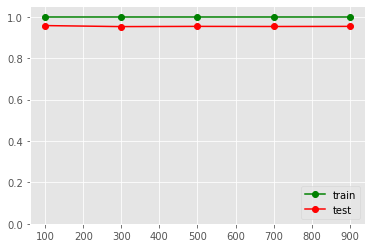

In [95]:
# График зависимости качества модели на обучающей и на тестовой выборках от количества деревьев

pyplot.grid(True)
pyplot.plot(n_estimators_values, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(n_estimators_values, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')
pyplot.show()

#### 1.2.2 Зависимость качества модели на обучающей и на тестовой выборках от количества деревьев при маленьком количестве деревьев

In [85]:
n_estimators_values_m = np.arange(1, 20, 1)

train_scores_m, test_scores_m = model_selection.validation_curve(estimator=rf_classifier, 
                                                                 X=X, 
                                                                 y=y, 
                                                                 param_name='n_estimators', 
                                                                 param_range=n_estimators_values_m,
                                                                 cv=10)

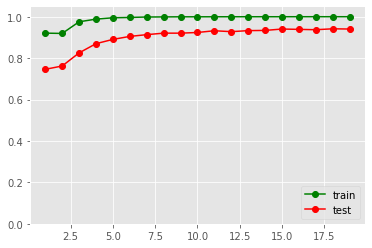

In [94]:
# График зависимости качества модели на обучающей и на тестовой выборках от количества деревьев

pyplot.grid(True)
pyplot.plot(n_estimators_values_m, train_scores_m.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(n_estimators_values_m, test_scores_m.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')
pyplot.show()

#### 1.2.3 Зависимость качества модели на обучающей и на тестовой выборках от количества признаков при большом количестве признаков

In [87]:
max_features_values = np.arange(30, 50, 5)

train_scores_f, test_scores_f = model_selection.validation_curve(estimator=rf_classifier, 
                                                                 X=X, 
                                                                 y=y, 
                                                                 param_name='max_features', 
                                                                 param_range=max_features_values,
                                                                 cv=10)

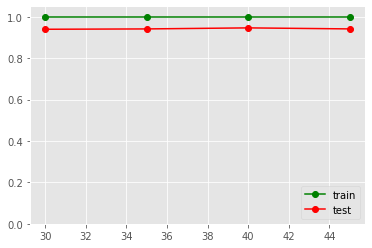

In [93]:
# График зависимости качества модели на обучающей и на тестовой выборках от количества признаков

pyplot.grid(True)
pyplot.plot(max_features_values, train_scores_f.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(max_features_values, test_scores_f.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')
pyplot.show()

#### 1.2.4 Зависимость качества модели на обучающей и на тестовой выборках от количества признаков при небольшом количестве признаков

In [89]:
max_features_values_m = np.arange(5, 10, 1)

train_scores_f_m, test_scores_f_m = model_selection.validation_curve(estimator=rf_classifier, 
                                                                     X=X, 
                                                                     y=y, 
                                                                     param_name='max_features', 
                                                                     param_range=max_features_values_m,
                                                                     cv=10)

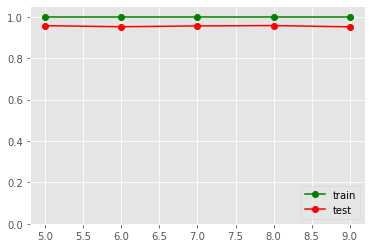

In [90]:
# График зависимости качества модели на обучающей и на тестовой выборках от количества признаков

pyplot.grid(True)
pyplot.plot(max_features_values_m, train_scores_f_m.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(max_features_values_m, test_scores_f_m.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')
pyplot.show()

#### 1.2.6 Зависимость качества модели на обучающей и на тестовой выборках от максимальной глубины деревьев при небольшой максимальной глубине деревьев

In [91]:
max_depth_values = np.arange(1, 11, 1)

train_scores_d, test_scores_d = model_selection.validation_curve(estimator=rf_classifier, 
                                                                 X=X, 
                                                                 y=y, 
                                                                 param_name='max_depth', 
                                                                 param_range=max_depth_values,
                                                                 cv=10)

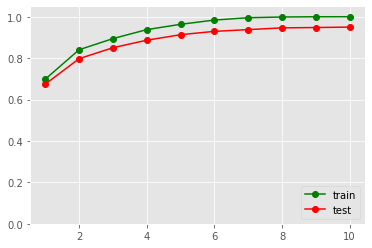

In [92]:
# График зависимости качества модели на обучающей и на тестовой выборках от максимальной глубины деревьев 
# при небольшой максимальной глубине деревьев

pyplot.grid(True)
pyplot.plot(max_depth_values, train_scores_d.mean(axis = 1), 'g-', marker='o', label='train')
pyplot.plot(max_depth_values, test_scores_d.mean(axis = 1), 'r-', marker='o', label='test')
pyplot.ylim((0.0, 1.05))
pyplot.legend(loc='lower right')
pyplot.show()

## 2. Случайный лес и бэггинг

__Бэггинг__ - обучение базовых алгоритмов происходит на случайных подвыборках обучающей выборки (обучение на случайных подвыборках объектов с полным набором признаков). Причем чем меньше размер случайной подвыборки, тем более независимыми получаются базовые алгоритмы

**Генерация данных** для сравнения качества моделей классификации

In [67]:
# Загрузка датасета
data = datasets.load_digits()

# Пространство признаков
X = data.data

# Целевая функция
y = data.target

print('Соотношение классов:')
for i in sorted(set(y)):
    print(i, ':', y[y==i].shape[0])

Соотношение классов:
0 : 178
1 : 182
2 : 177
3 : 183
4 : 181
5 : 182
6 : 181
7 : 179
8 : 174
9 : 180


### 2.1 Оценка качества работы классификатора DecisionTreeClassifier при использовании настроек по-умолчанию

In [39]:
# Создание модели многоклассовой классификации DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=1)

In [40]:
# Оценка модели многоклассовой классификации на кросс-валидации
clf_scoring = model_selection.cross_val_score(estimator=clf, X=X, y=y, scoring = 'accuracy', cv = 10)

# clf - классификатор DecisionTreeClassifier
# accuracy - доля правильных ответов
# cv = 10 - стандартная кросс-валидация на 10 фолдов (KFold или StratifiedKFold)
# Для бинарной стратификации по умолчанию используется StratifiedKFold

In [41]:
# Средняя оценка качества работы классификатора, измеренная на 10 фолдах
clf_scoring.mean()

0.8308624439503834

### 2.2 Оценка качества работы классификатора BaggingClassifier при использовании настроек по-умолчанию

In [43]:
# Создание модели многоклассовой классификации BaggingClassifier
bagg = ensemble.BaggingClassifier(base_estimator=clf, n_estimators=100, random_state=1)

In [44]:
# Оценка модели многоклассовой классификации на кросс-валидации
bagg_scoring = model_selection.cross_val_score(estimator=bagg, X=X, y=y, scoring = 'accuracy', cv = 10)

In [45]:
# Средняя оценка качества работы классификатора, измеренная на 10 фолдах
bagg_scoring.mean()

0.9271102572603436

### 2.3 Оценка качества работы классификатора BaggingClassifier при использовании в обучении $\sqrt d$ признаков при построении всех вершин каждого дерева

In [46]:
# Создание модели многоклассовой классификации BaggingClassifier с обучением на sqrt(d) признаков 
# (при построении всех вершин каждого дерева)
bagg_sqrtd = ensemble.BaggingClassifier(base_estimator=clf, n_estimators=100, max_features=8, random_state=1)

In [47]:
# Оценка модели многоклассовой классификации на кросс-валидации
bagg_sqrtd_scoring = model_selection.cross_val_score(estimator=bagg_sqrtd, X=X, y=y, scoring = 'accuracy', cv = 10)

In [48]:
# Средняя оценка качества работы классификатора, измеренная на 10 фолдах
bagg_sqrtd_scoring.mean()

0.933810128907554

### 2.4 Оценка качества работы классификатора BaggingClassifier при использовании в обучении $\sqrt d$ признаков при построении каждой вершины каждого дерева

In [49]:
# Создание модели многоклассовой классификации DecisionTreeClassifier с выбором случайных признаков при
# построении каждой вершины дерева
clf_sqrtd = tree.DecisionTreeClassifier(random_state=1, max_features=8)

In [50]:
# Создание модели многоклассовой классификации BaggingClassifier
bagg_clf_sqrtd = ensemble.BaggingClassifier(base_estimator=clf_sqrtd, n_estimators=100, random_state=1)

In [51]:
# Оценка модели многоклассовой классификации на кросс-валидации
bagg_clf_sqrtd_scoring = model_selection.cross_val_score(estimator=bagg_clf_sqrtd, X=X, y=y, scoring = 'accuracy', cv = 10)

In [52]:
# Средняя оценка качества работы классификатора, измеренная на 10 фолдах
bagg_clf_sqrtd_scoring.mean()

0.9500349636021452

## 3. Градиентный бустинг (Sklearn и XGBoost)

Доступен в sklearn.ensemble.GradientBoostingClassifier 
и в [xgboost.XGBClassifier](http://xgboost.readthedocs.org/en/latest/python/python_api.html)

**Загрузка данных** для демонстрации работы модели

[Данные](https://www.kaggle.com/c/bioresponse/data) взяты из [задачи на kaggle](https://www.kaggle.com/c/bioresponse). По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response). Признаки нормализаваны.

In [97]:
data = pd.read_csv('bioresponse.csv', header=0, sep=',')

# Выделение целевой переменной
y = data['Activity'].values

# Выделение признакового пространства
X = data.iloc[:, 1:]

# Распределение объектов по классам

print('Соотношение классов:')
for i in sorted(set(y)):
    print(i, ':', y[y==i].shape[0])

Соотношение классов:
0 : 1717
1 : 2034


### 3.1 Зависимость качества модели от количесвта деревьев

#### 3.1.1 Модель случайного леса RandomForestClassifier

In [98]:
# Количество деревьев (1 и от 10 до 55 с шагом 5)
n_trees = [1] + list(range(10, 55, 5))

In [100]:
%%time
scoring = []
for n_tree in n_trees:
    estimator = ensemble.RandomForestClassifier(n_estimators = n_tree, min_samples_split=5, random_state=1)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = 3)    
    scoring.append(score)
scoring = np.asmatrix(scoring)

Wall time: 14.6 s


In [101]:
scoring

matrix([[0.66906475, 0.668     , 0.6704    ],
        [0.75859313, 0.7592    , 0.7504    ],
        [0.78097522, 0.7616    , 0.7592    ],
        [0.78417266, 0.7736    , 0.7648    ],
        [0.78257394, 0.7736    , 0.7704    ],
        [0.78816946, 0.7752    , 0.7736    ],
        [0.78816946, 0.7856    , 0.7776    ],
        [0.78896882, 0.78      , 0.7832    ],
        [0.78976819, 0.7856    , 0.7896    ],
        [0.79536371, 0.7816    , 0.7928    ]])

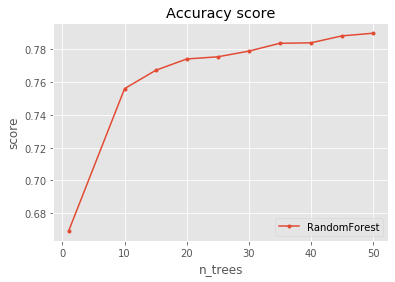

In [102]:
# График зависимости качества модели от количества деревьев

pyplot.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pyplot.grid(True)
pyplot.xlabel('n_trees')
pyplot.ylabel('score')
pyplot.title('Accuracy score')
pyplot.legend(loc='lower right')
pyplot.show()

#### 3.1.2 Модель градиентного бустинга xgboost.XGBClassifier

In [103]:
%%time
xgb_scoring = []
for n_tree in n_trees:
    estimator = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=n_tree, min_child_weight=3)
    score = model_selection.cross_val_score(estimator, X, y, 
                                             scoring = 'accuracy', cv = 3)    
    xgb_scoring.append(score)
xgb_scoring = np.asmatrix(xgb_scoring)

Wall time: 1min 9s


In [104]:
xgb_scoring

matrix([[0.76498801, 0.756     , 0.756     ],
        [0.77617906, 0.7752    , 0.7688    ],
        [0.77857714, 0.7744    , 0.7768    ],
        [0.7873701 , 0.7784    , 0.7768    ],
        [0.79216627, 0.7736    , 0.7832    ],
        [0.79776179, 0.7776    , 0.7824    ],
        [0.79616307, 0.7816    , 0.78      ],
        [0.79296563, 0.7848    , 0.7792    ],
        [0.79856115, 0.7832    , 0.7808    ],
        [0.79936051, 0.7832    , 0.7832    ]])

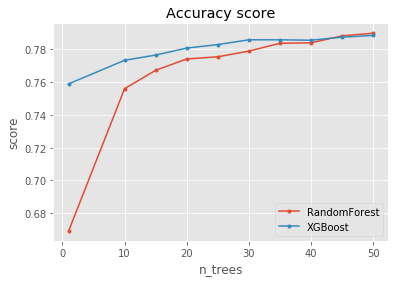

In [105]:
# График зависимости качества модели от количества деревьев для двух методов

pyplot.plot(n_trees, scoring.mean(axis = 1), marker='.', label='RandomForest')
pyplot.plot(n_trees, xgb_scoring.mean(axis = 1), marker='.', label='XGBoost')
pyplot.grid(True)
pyplot.xlabel('n_trees')
pyplot.ylabel('score')
pyplot.title('Accuracy score')
pyplot.legend(loc='lower right')
pyplot.show()